In [6]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

2024-07-14 17:15:57.809378: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-14 17:15:57.809478: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-14 17:15:57.952735: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**IMPORTING TENSORFLOW PRE-BUILT MODEL**

In [7]:
ESRGAN_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"

In [8]:
import tensorflow_hub as hub
model = hub.load(ESRGAN_MODEL_PATH)

**DOWNLOADING IMAGE FROM WEBSITES**

In [53]:
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt
def download_image(url):
    content = requests.get(url).content
    image_ar = np.asarray(bytearray(content), dtype=np.uint8)
    imgout = cv2.cvtColor(cv2.imdecode(image_ar, -1), cv2.COLOR_BGR2RGB)    
    return imgout

**PLOTTING IMAGE**

In [54]:
def plot_image(img):
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.show()

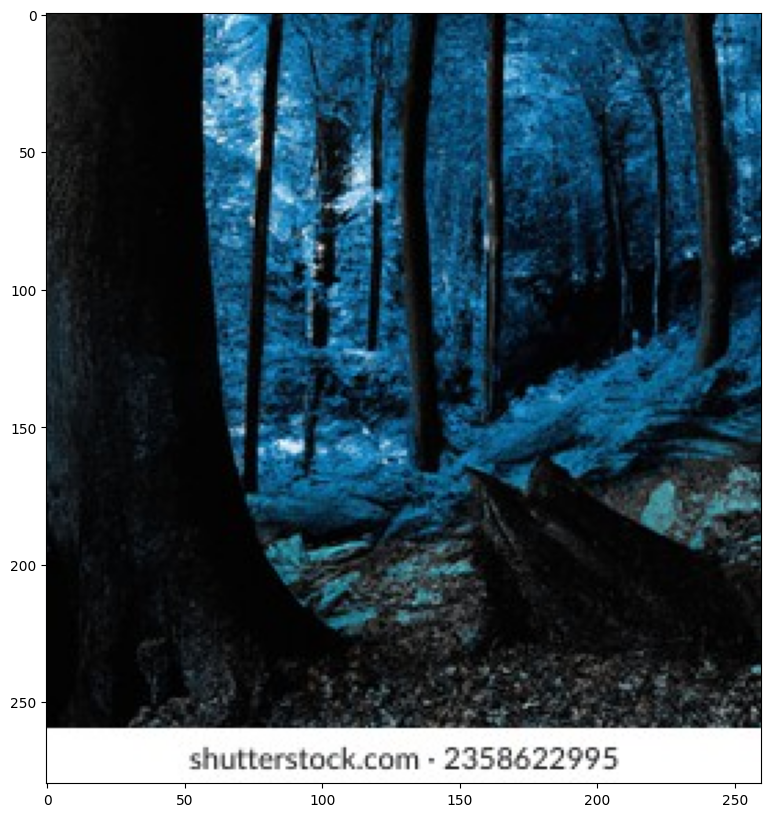

In [55]:
url = "https://www.shutterstock.com/image-photo/blue-forest-sides-260nw-2358622995.jpg"
test_image = download_image(url)
plot_image(test_image)

ADDING BATCH DIMENSION AND CONVERTING IAMGES TO multiple of 4 dimenssion

In [56]:
def preprocess_image(image):
    image_size = (tf.convert_to_tensor(test_image.shape[:-1]) // 4) * 4
#     cropped_image = tf.image.crop_to_bounding_box(image, 0, 0, image_size[0], image_size[1])
    new_image = tf.cast(image, tf.float32)
    return tf.expand_dims(new_image, 0)

In [57]:
def run(image):
    preprocessed_image = preprocess_image(image)
    new_image = model(preprocessed_image)
    return tf.squeeze(new_image) / 255.0

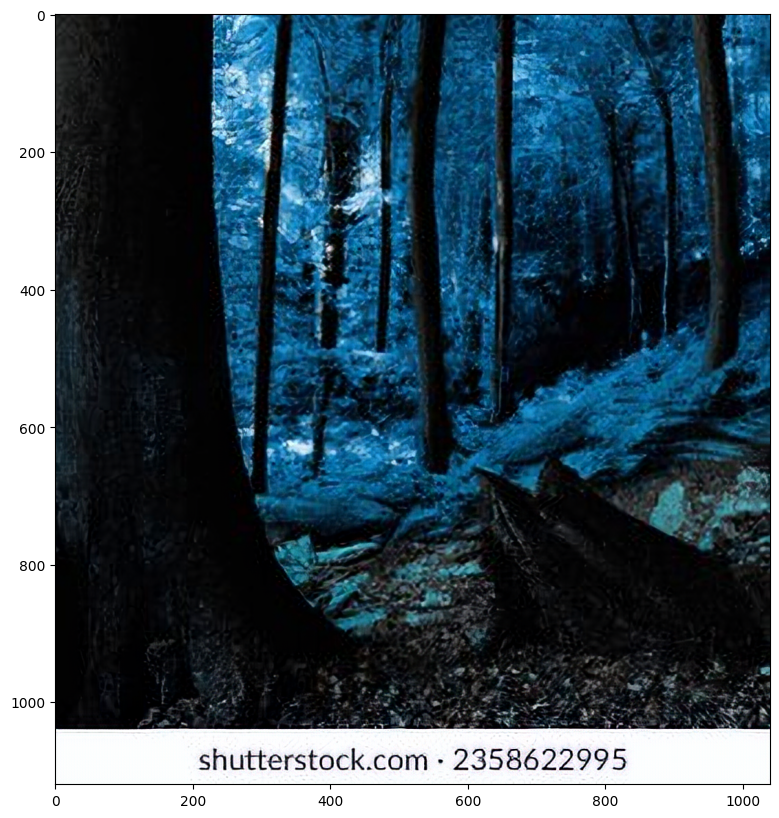

In [58]:
fake_image = run(test_image)
plot_image(fake_image)

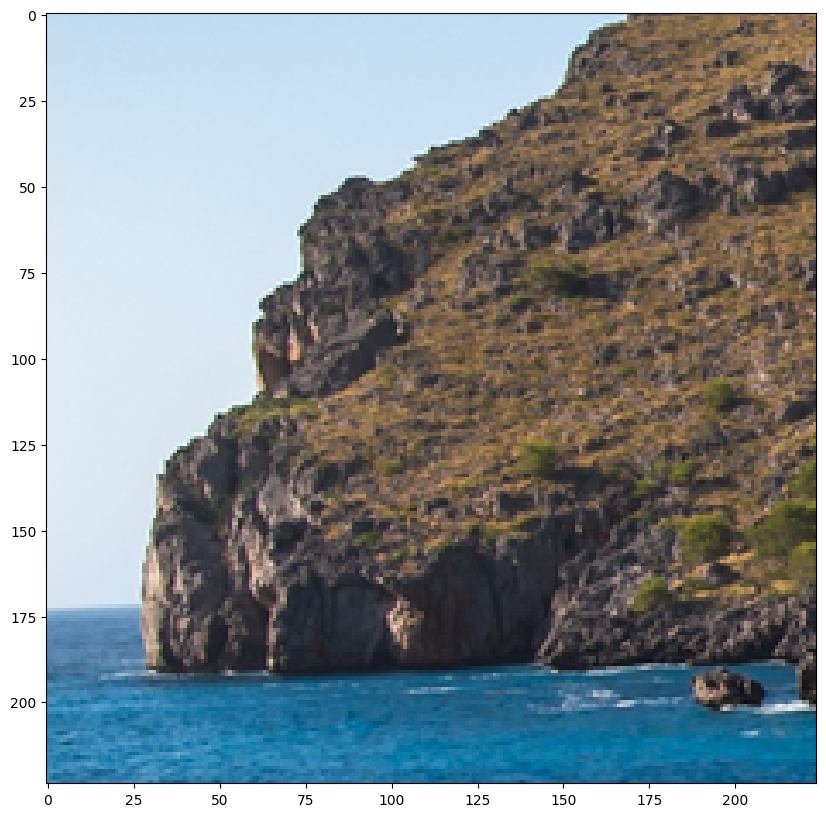

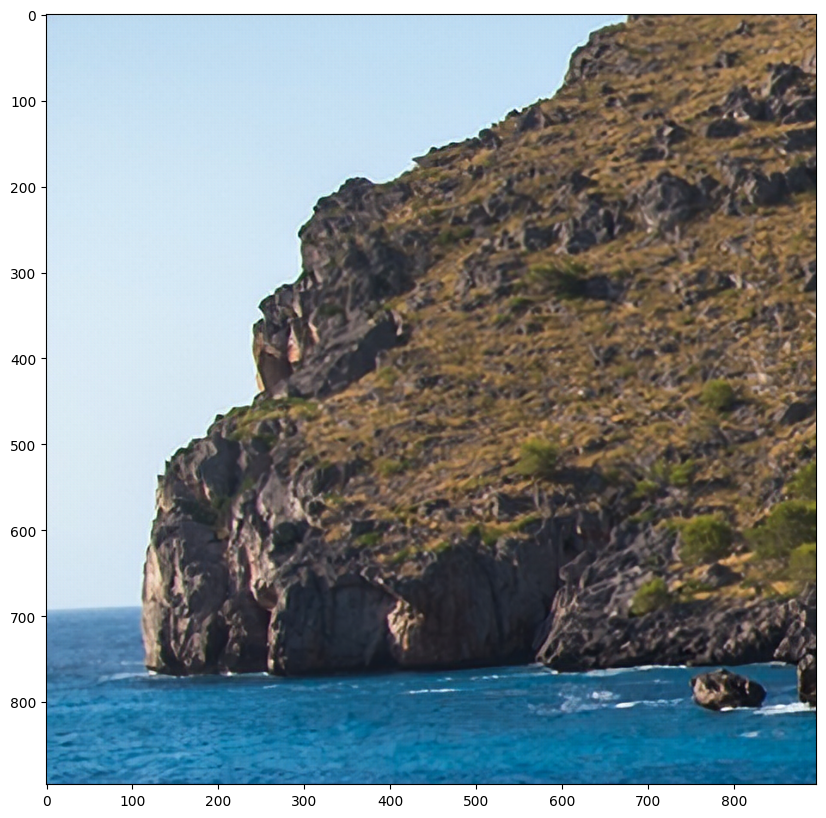

In [18]:
url = "https://raw.githubusercontent.com/fenghansen/ESRGAN-Keras/master/images/inputs/50-(2%2C2).png"
test_image = download_image(url)
plot_image(test_image)
fake_image = run(test_image)
plot_image(fake_image)

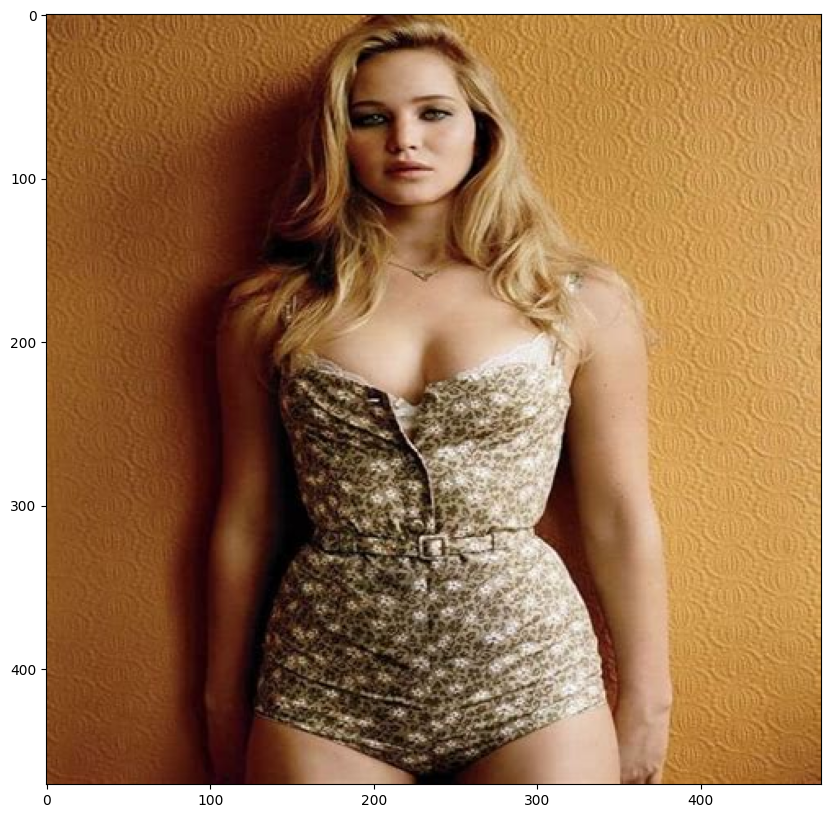

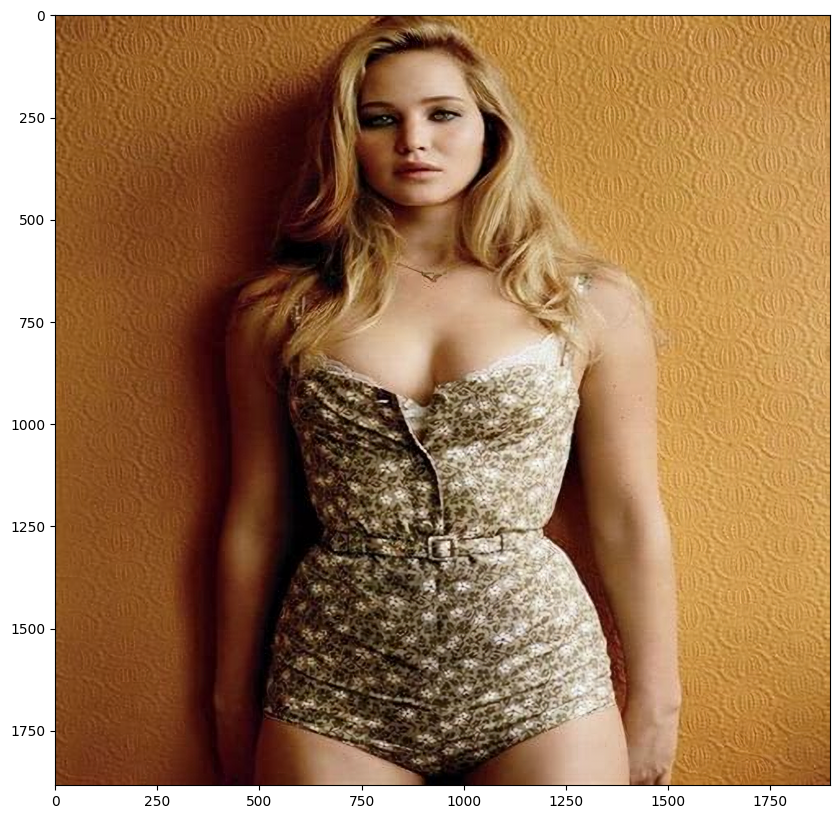

In [60]:
path="/kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset/Jennifer Lawrence/097_f19b4cfc.jpg"
import cv2
img=cv2.imread(path)
image_ar = np.asarray(bytearray(img), dtype=np.uint8)
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plot_image(img)
fake_image = run(img)
plot_image(fake_image)

#if wondering abouut the up-scaling check the scale

In [ ]:
# ATTEMPT TO MAKE SRGRAN FROM SCRATCH WHICH DOESNT WORK 
# THESE DOESNT WORK :(

In [ ]:
# def get_G(input_shape):
#     g_init=tf.random_normal_initializer(1.,0.02)
#     relu=Activation('relu')
#     nin=Input(shape=input_shape)
#     n=Conv2D(64,(3,3),padding='SAME',activation='relu',kernel_initializer='HeNormal')(nin)
#     temp=n
#     # Residual blocks
#     for i in range(3):
#         nn=Conv2D(64,(3,3),padding='SAME',kernel_initializer='HeNormal')(n)
#         nn=BatchNormalization(gamma_initializer=g_init)(nn)
#         nn=relu(nn)
#         nn=Conv2D(64,(3, 3),padding='SAME',kernel_initializer='HeNormal')(n)
#         nn=BatchNormalization(gamma_initializer=g_init)(nn)
#         nn=add([n,nn])
#         n=nn
#     n=Conv2D(64,(3, 3),padding='SAME',kernel_initializer='HeNormal')(n)
#     n=BatchNormalization(gamma_initializer=g_init)(n)
#     n=add([n,temp])
#     # Upsampling
#     n=Conv2D(256,(3,3),padding='SAME',kernel_initializer='HeNormal')(n)
#     n=SubpixelConv2D(upsampling_factor=2)(n)
#     n=relu(n)
#     n=Conv2D(256,(3,3),padding='SAME',kernel_initializer='HeNormal')(n)
#     n=SubpixelConv2D(upsampling_factor=2)(n)
#     n=relu(n)
#     nn=Conv2D(3,(1,1) ,padding='SAME',kernel_initializer='HeNormal',activation='tanh')(n)
#     G=Model(inputs=nin,outputs=nn,name="generator")
#     return G


DISCRIMINATOR

In [ ]:
# def get_D(input_shape):
#     g_init=tf.random_normal_initializer(1.,0.02)
#     ly_relu=LeakyReLU(alpha=0.2)
#     df_dim=16
#     nin=Input(shape=input_shape)
#     n=Conv2D(64,(4,4),strides=(2,2),padding='SAME',kernel_initializer='HeNormal')(nin)
#     n=ly_relu(n)
#     for i in range(2, 6):
#         n=Conv2D(df_dim*(2**i),(4,4),strides=(2,2),padding='SAME',kernel_initializer='HeNormal')(n)
#         n=ly_relu(n)
#         n=BatchNormalization(gamma_initializer=g_init)(n)
#     n=Conv2D(df_dim*16,(1,1),strides=(1,1),padding='SAME',kernel_initializer='HeNormal')(n)
#     n=ly_relu(n)
#     n=BatchNormalization(gamma_initializer=g_init)(n)
#     n=Conv2D(df_dim*8,(1,1),strides=(1,1),padding='SAME',kernel_initializer='HeNormal')(n)
#     n=BatchNormalization(gamma_initializer=g_init)(n)
#     temp=n
#     n=Conv2D(df_dim*4,(3,3),strides=(1,1),padding='SAME',kernel_initializer='HeNormal')(n)
#     n=ly_relu(n)
#     n=BatchNormalization(gamma_initializer=g_init)(n)
#     n=Conv2D(df_dim*8,(3,3),strides=(1,1),padding='SAME',kernel_initializer='HeNormal')(n)
#     n=BatchNormalization(gamma_initializer=g_init)(n)
#     n=add([n,temp])
#     n=Flatten()(n)
#     no=Dense(units=1,kernel_initializer='HeNormal',activation='sigmoid')(n)
#     D=Model(inputs=nin,outputs=no,name="discriminator")
#     return D

In [ ]:
# def get_vgg19():
#     vgg= tf.keras.applications.VGG19( include_top=False, weights='imagenet',input_shape=(384, 384, 3),classes=1000,classifier_activation='softmax' )
#     inp= Input(shape=(384, 384, 3))
#     x= vgg.layers[0](inp)
#     for ly in vgg.layers[1:17]:
#         x= ly(x)
#     VGG19= Model(inp,x)
#     return VGG19
# G = get_G((96, 96, 3))
# D = get_D((384, 384, 3))
# vgg= get_vgg19()
# g_optimizer_init = tf.optimizers.Adam()
# g_optimizer = tf.optimizers.Adam()
# d_optimizer = tf.optimizers.Adam()
# #finally learning